In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\U\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


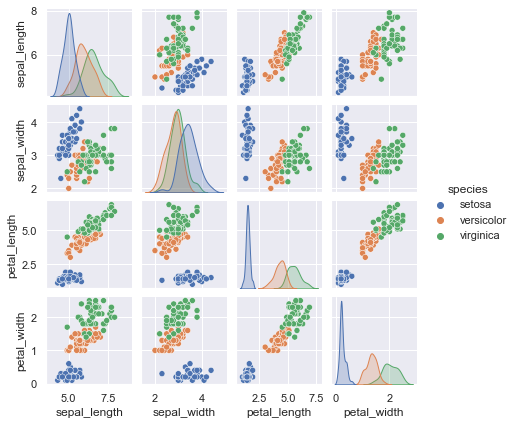

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5);

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
import numpy as np
import pandas as pd

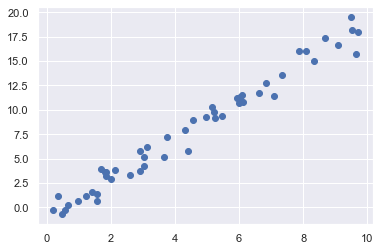

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept = True)

In [11]:
model

LinearRegression()

In [12]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [13]:
model.fit(X, y)

LinearRegression()

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311181

In [16]:
xfit = np.linspace(-1, 11)

In [17]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

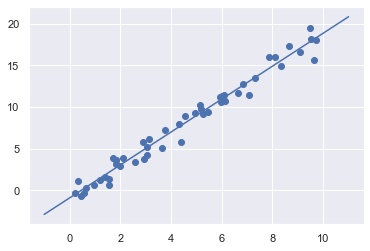

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [22]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

In [30]:
from sklearn.decomposition import PCA

model = PCA(n_components = 2)
model.fit(X_iris)

X_2D = model.transform(X_iris)

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


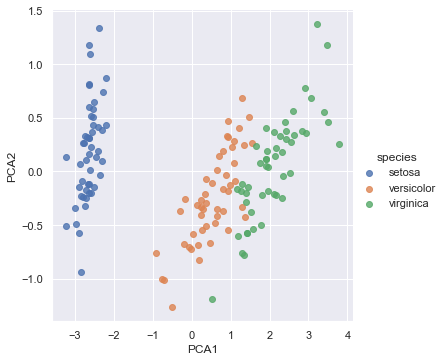

In [33]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', fit_reg = False);

In [38]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(X_iris)

y_gmm = model.predict(X_iris)

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


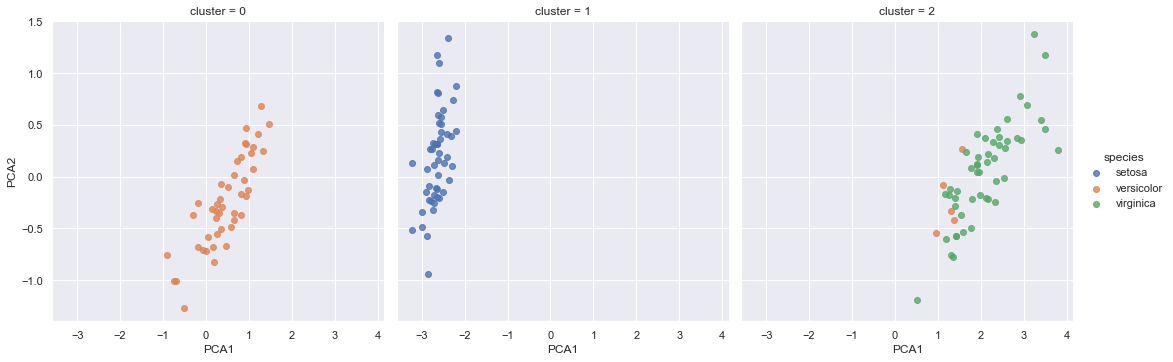

In [39]:
iris['cluster'] = y_gmm

sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False);

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

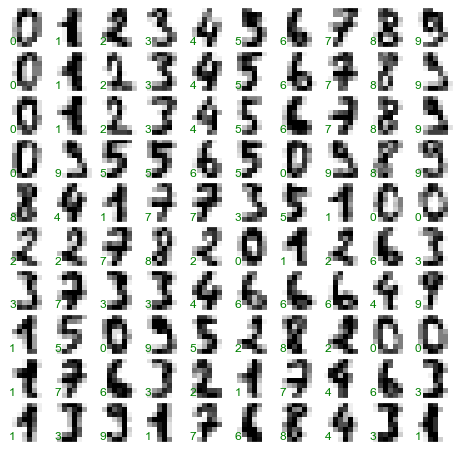

In [42]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks': []}, 
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green')

In [43]:
X = digits.data
X.shape

(1797, 64)

In [44]:
y = digits.target
y.shape

(1797,)

In [47]:
from sklearn.manifold import Isomap

iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\U\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\U\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

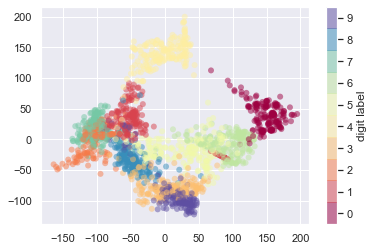

In [49]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5,
           cmap = plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5);

In [50]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, random_state = 0)

In [51]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [52]:
accuracy_score(ytest, y_model)

0.8333333333333334

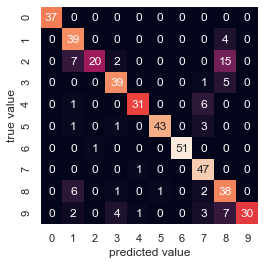

In [54]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square = True, annot = True, cbar = False)

plt.xlabel('predicted value')
plt.ylabel('true value');

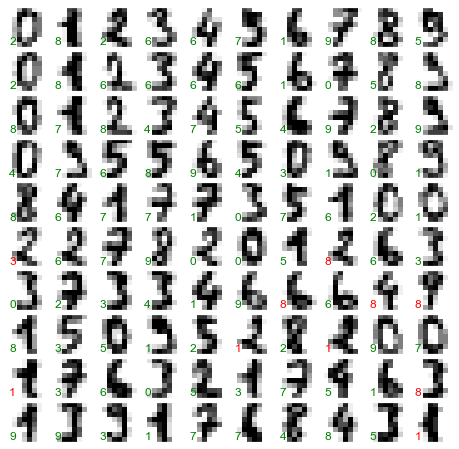

In [58]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = dict(xticks = [], yticks = []),
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform = ax.transAxes, color = 'green' if (y_model[i] == ytest[i]) else 'red')

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

In [61]:
model.fit(X, y)
y_model = model.predict(X)

In [62]:
accuracy_score(y_model, y)

1.0

In [63]:
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [65]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)